# Машинное обучение. Практическое задание №2

Выполнил: Колованов Родион Алексеевич, группа 9381.

## Задание 1

Рассмотрим данные:

| i  | a1  | a2  |
|:--:|:---:|:---:|
| x1 | 4   | 2.9 |
| x2 | 2.5 | 1   |
| x3 | 3.5 | 4   |
| x4 | 2   | 2.1 |

Строки соответствуют наблюдениям, столбцы признакам. $x_{i1}$ означает 1-й признак i-го наблюдения.

Есть ядро (функция сходства):

$$ K(x_i, x_j) = \|x_i - x_j\|^2 = (x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 $$

Рассчитайте ядерную матрицу. Ядерная матрица должна получиться размером 4х4, на главной диагонали которой стоят 0. По смыслу, ядерная матрица отражает близость между двумя наблюдениями согласно метрике, задаваемой функцией сходства.

### Решение

Подключим необходимые библиотеки:

In [70]:
import numpy as np
import matplotlib.pyplot as plt

Начальные данные:

In [18]:
def K(a, b):
    return np.sum((a - b) ** 2)

In [19]:
X = np.array([[4, 2.9], [2.5, 1], [3.5, 4], [2, 2.1]])
X_len = len(X)

Рассчитаем ядерную матрицу:

In [20]:
K_matrix = np.full((X_len, X_len), 0.0)

for i in range(len(X)):
    for j in range(len(X)):
        K_matrix[i,j] = K(X[i,:], X[j,:])

print(np.round(K_matrix, 3))

[[ 0.    5.86  1.46  4.64]
 [ 5.86  0.   10.    1.46]
 [ 1.46 10.    0.    5.86]
 [ 4.64  1.46  5.86  0.  ]]


## Задание 2

Рассмотрим данные в виде матрицы $D$:

| i  | a1  | a2  |
|:--:|:---:|:---:|
| x1 | 8   | -20 |
| x2 | 0   | -1  |
| x3 | 10  | -19 |
| x4 | 10  | -20 |
| x5 | 2   | 0   |

Строки соответствуют наблюдениям, столбцы признакам.

1. Рассчитайте среднее $\mu$ и ковариационную матрицу $\Sigma$ для матрицы $D$;
2. Рассчитайте собственные числа для матрицы $\Sigma$;
3. Рассчитайте матрицу корреляций.

### Решение

Начальные данные:

In [119]:
D = np.array([[8, -20], [0, -1], [10, -19], [10, -20], [2, 0]])
D_len = len(D)

Рассчитаем среднее $\mu$ и ковариационную матрицу $\Sigma$ для матрицы $D$:

In [120]:
D_mean = sum(D) / D_len
D_cov = np.cov(D.T)

print("Среднее: {}\nМатрица ковариации:\n{}".format(D_mean, D_cov))

Среднее: [  6. -12.]
Матрица ковариации:
[[ 22.  -47.5]
 [-47.5 110.5]]


Рассчитаем собственные числа для матрицы $\Sigma$:

In [122]:
D_eig = np.linalg.eig(D_cov)
D_eig_values = np.round(D_eig[0], 3)

print(D_eig_values)

[  1.332 131.168]


Рассчитаем матрицу корреляций:

In [123]:
D_corr = np.round(np.corrcoef(D.T), 3)

print(D_corr)

[[ 1.    -0.963]
 [-0.963  1.   ]]


## Задание 3

Для данных и полученных результатов из второго задания:

1. Рассчитай первые две главные компоненты;
2. На основании собственных чисел рассчитайте остаточную дисперсию для каждой компоненты;
3. В декартовых координатах исходного пространства, отобразите вектора соответствующие главным компонентам. (таким образом будет видно, на какие вектора проводилась проекция). В качестве точки, откуда начинаются вектора, используйте $\mu$.

### Решение

Найдем первые две компоненты:

In [231]:
D_centered = D - D_mean
D_centered_eig = np.linalg.eig(np.cov(D_centered.T))

# Упорядочиваем собственные числа и векторы в порядке уменьшения собственных чисел
sorted_eig_indexes = list(np.argsort(D_centered_eig[0]))
sorted_eig_indexes.reverse()

for i in sorted_eig_indexes:
    print(D_centered_eig[1][:,i])

[ 0.39897876 -0.91696017]
[-0.91696017 -0.39897876]


На основании собственных чисел рассчитаем остаточную дисперсию для каждой компоненты:

In [232]:
print("Для первой компоненты:", D_centered_eig[0][1])
print("Для второй компоненты:", 0.0) # Нечего суммировать

Для первой компоненты: 131.16773640539233
Для второй компоненты: 0.0


В декартовых координатах исходного пространства, отобразим вектора, соответствующие главным компонентам:

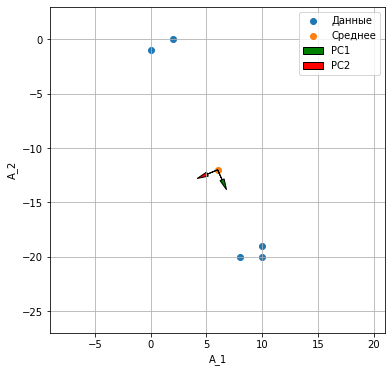

In [235]:
plt.figure(figsize=(6, 6))

plt.scatter(D[:,0], D[:,1], label="Данные")
plt.scatter(D_mean[0], D_mean[1], label="Среднее")

plt.arrow(D_mean[0], D_mean[1], D_centered_eig[1][0,1], D_centered_eig[1][1,1],
          head_width=0.4, head_length=1, fc='green', ec='black', label="PC1")
plt.arrow(D_mean[0], D_mean[1], D_centered_eig[1][0,0], D_centered_eig[1][1,0],
          head_width=0.4, head_length=1, fc='red', ec='black', label="PC2")

plt.xlabel("A_1")
plt.ylabel("A_2")
plt.xlim(D_mean[0] - 15, D_mean[0] + 15)
plt.ylim(D_mean[1] - 15, D_mean[1] + 15)
plt.legend()
plt.grid()
plt.show()